In [16]:
from NFLDatabaseAdapter import NFLDatabaseAdapter
from gensim import corpora, models, similarities
import numpy as np
from gensim.models import LdaModel
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [17]:
# Load the Patriots test model

corpus_filename = 'Patriots/corpus.mm'
dict_filename   = 'Patriots/dictionary.dict'
lda_filename    = 'Patriots/model.lda'
corpus = corpora.MmCorpus(corpus_filename)
dictionary = corpora.Dictionary.load(dict_filename)
Patriots_lda = LdaModel.load(lda_filename)
Patriots_display = pyLDAvis.gensim.prepare(Patriots_lda, corpus, dictionary, sort_topics=False)

/home2/haberc/tmp/Habes/NFL/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [18]:
pyLDAvis.display(Patriots_display)

In [31]:
# Load the Falcons test model

corpus_filename = 'Falcons/corpus.mm'
dict_filename   = 'Falcons/dictionary.dict'
lda_filename    = 'Falcons/model.lda'
corpus = corpora.MmCorpus(corpus_filename)
dictionary = corpora.Dictionary.load(dict_filename)
Falcons_lda = LdaModel.load(lda_filename)
Falcons_display = pyLDAvis.gensim.prepare(Falcons_lda, corpus, dictionary, sort_topics=False)

/home2/haberc/tmp/Habes/NFL/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [30]:
pyLDAvis.display(Falcons_display)

In [24]:
# Load the Broncos test model

corpus_filename = 'Broncos/corpus.mm'
dict_filename   = 'Broncos/dictionary.dict'
lda_filename    = 'Broncos/model.lda'
corpus = corpora.MmCorpus(corpus_filename)
dictionary = corpora.Dictionary.load(dict_filename)
Broncos_lda = LdaModel.load(lda_filename)
Broncos_display = pyLDAvis.gensim.prepare(Broncos_lda, corpus, dictionary, sort_topics=False)

/home2/haberc/tmp/Habes/NFL/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [25]:
pyLDAvis.display(Broncos_display)

In [32]:
from collections import OrderedDict

data_lda = {i: OrderedDict(Falcons_lda.show_topic(i,25)) for i in range(5)}
#data_lda

In [33]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(107, 5)
(5, 107)


In [34]:
df_lda

,ain,allowing,already,another,appreciate,around,back,ball,bday,believe,...,way,well,win,wit,work,workout,world,yea,yeah,year
0,0.000000,0.000000,0.00000,0.0000,0.000000,0.003236,0.021005,0.002944,0.000000,0.000000,...,0.005240,0.000000,0.000000,0.000000,0.009397,0.003595,0.0000,0.00000,0.000000,0.000000
1,0.010389,0.000000,0.00558,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006048,0.000000,0.000000,0.0000,0.01019,0.005416,0.000000
2,0.000000,0.009303,0.00000,0.0222,0.016051,0.000000,0.000000,0.000000,0.005822,0.000000,...,0.000000,0.004634,0.000000,0.000000,0.000000,0.000000,0.0104,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003901,...,0.003942,0.000000,0.000000,0.000000,0.005607,0.000000,0.0000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.004981,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010747,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.008176


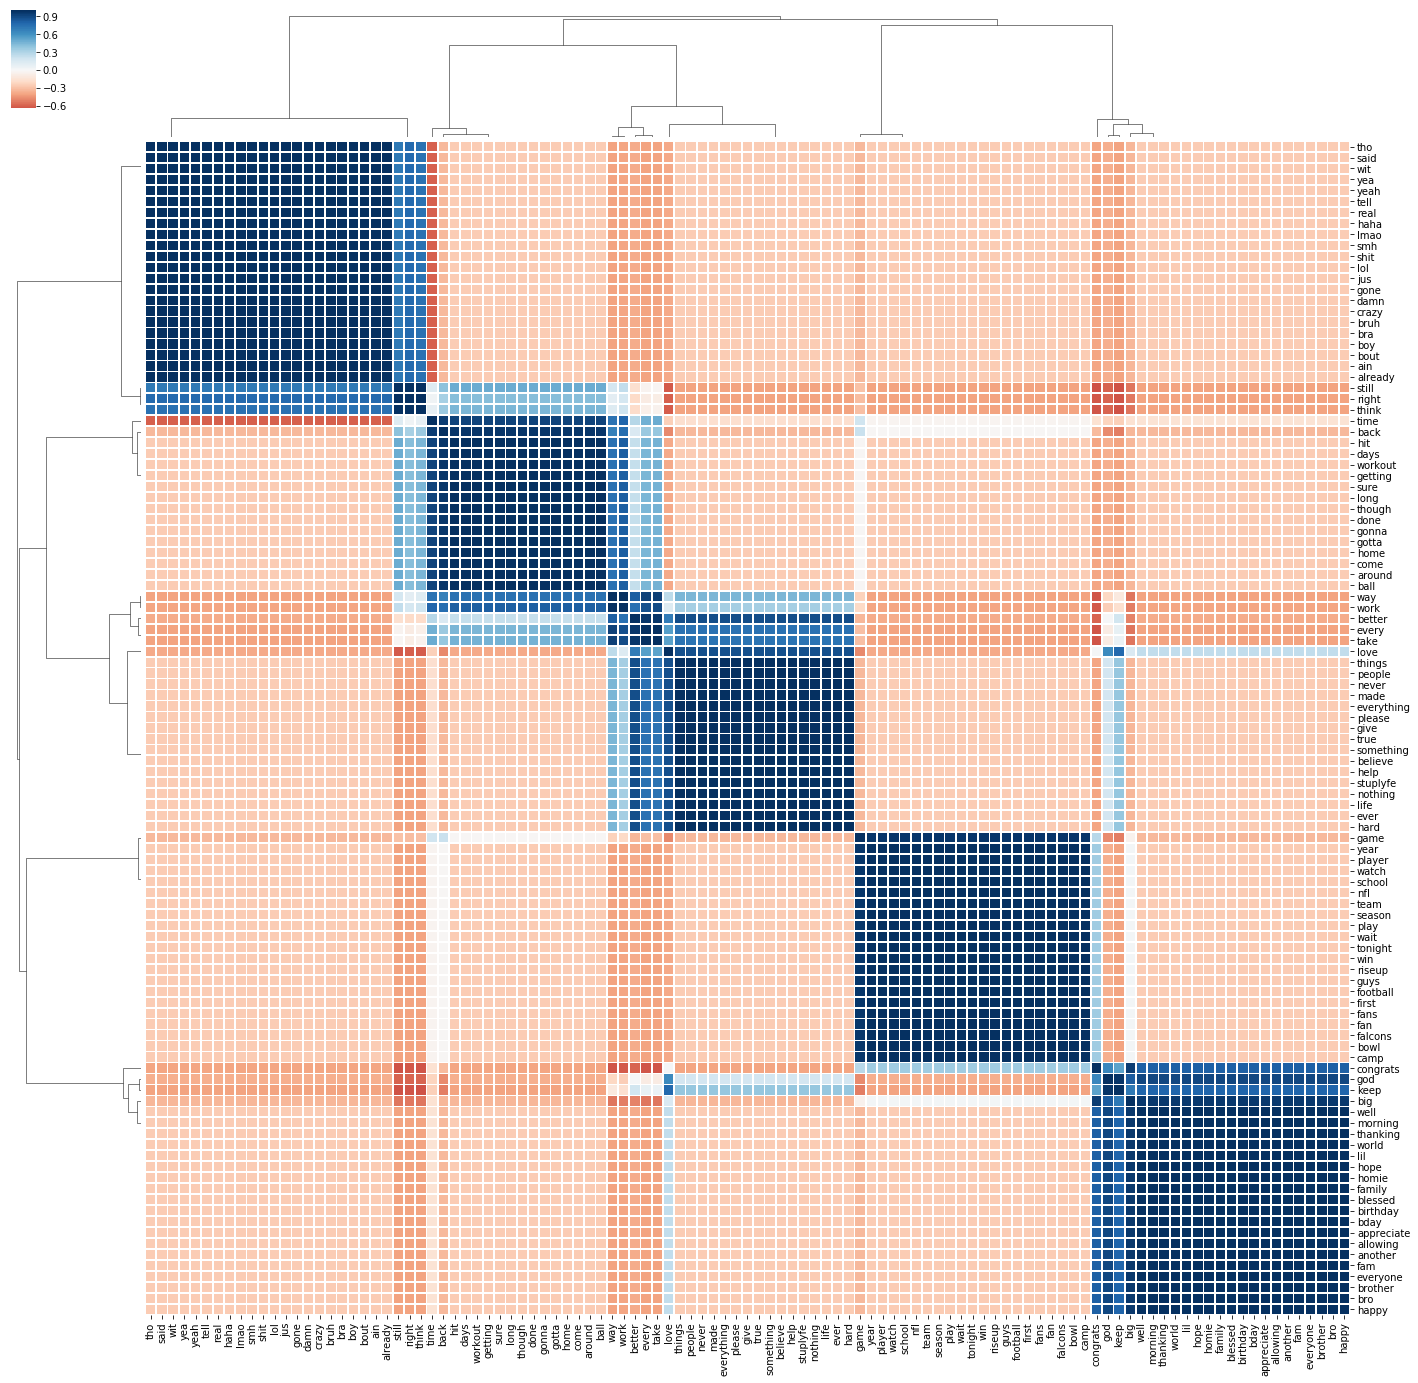

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(24, 24))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()